## 0. Introduction
Housing prices generally increase each year so there is a need to predict their future prices. For developers price prediction can help determine an appropriate selling price, while for customers it helps in arranging the right time of purchase. A wide variety of factors can affect the price of a house, but generally they fall within one of three categories physical conditions, concept and location (Rahadi, et al, 2015). The aspects of the house that are observed by human senses generally fall under physical conditions, which includes the size of the house, the number of bedrooms, the availability of kitchen and garage, the availability of the garden, the area of land and buildings etc. The concept is an idea or offer by the developer to attract potential buyers. Examples include: minimalist home, healthy and green environment, and elite environment. Location is more obvious and it influences the prevailing land price, ease of access to public facilities such as schools, campus, hospitals, malls, restaurants and also the surrounding natural landscape (Alfiyatin et al., 2017) Regression is commonly used when trying to predict housing prices. But recently Artificial Neural Networks are also being used, especially when for larger datasets (Nghiep, & Al, 2001).

For the purposes of this project, the [Ames Housing Dataset](http://jse.amstat.org/v19n3/decock/AmesHousing.xls) ([De Cock, 2011](http://jse.amstat.org/v19n3/decock.pdf)) will be utilized. The dataset was compiled by Dean De Cock, who originally obtained it from the Assessor’s Office of Ames, Iowa in the form of a data dump from their records system. The original excel files contained 113 variables describing 3970 property sales which was modified to keep only the residential properties. There were multiple sales of the same property over time, so only the most recent one was kept. Also any variable requiring specialized knowledge were removed (De Cock, 2011).

In [1]:
# Making necessary imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.svm import SVR
import warnings

%matplotlib inline
sns.set(font_scale=1.4) # Increase font size
sns.set_style('whitegrid') # Setting the plot style
warnings.filterwarnings('ignore') # supress warnings
pd.set_option('display.max_columns', None) # Display all columns

## 1. Load dataset
The [Ames Housing Dataset](http://jse.amstat.org/v19n3/decock/AmesHousing.xls) is comprised of 2930 rows of data and 80 variables (23 nominal, 23 ordinal, 14 discrete, and 20 continuous) involved in assessing home values. The last column in the dataset `SalePrice` is the price of the property which we will try to predict using the other variables.

In [2]:
df = pd.read_excel(r"data/AmesHousing.xls", index_col=0); df.index.name = 'Index'
df.drop(columns=['PID'], inplace=True) # Dont need the property ID
df.columns = [col.replace(" ", "") for col in df.columns] # Removing spaces in column names
print(f"Total {df.shape[0]} rows, {df.shape[1]} columns")
df.head()

Total 2930 rows, 80 columns


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## 2. Data Wrangling
Before moving into exploratory analysis its helpful to clean the dataset. This is a significantly large dataset with a lot of columns. We might not need all of the data and indeed using all of it may be unproductive for the clarity of our analysis. So we will try to eliminate unecessary parts of the data for better focus.

#### Removing Non-residential Properties
According to the [data documentation](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt) provided with the dataset the `MSZoning` column identifies the general zoning classification which also includes non-residential zones such as *A (Agriculture), C (Commercial), FV (Floating Village)*, and *I (Industrial)*.

In [3]:
print(df.MSZoning.unique())
df.MSZoning.value_counts()

['RL' 'RH' 'FV' 'RM' 'C (all)' 'I (all)' 'A (agr)']


RL         2273
RM          462
FV          139
RH           27
C (all)      25
A (agr)       2
I (all)       2
Name: MSZoning, dtype: int64

For the purposes of this analysis we will only work with resisdential sites and remove the others, since there are different factors that influence the price of a residential property compared to the other categories.

In [4]:
# Indentifying the row indexes for non-residential zones
rem_index = df[(df.MSZoning == 'A (agr)') | (df.MSZoning == 'I (all)') | 
               (df.MSZoning == 'C (all)') | (df.MSZoning == 'FV')].index
# Removing the rows identified
df.drop(index=rem_index, inplace=True)
print(f"Total {df.shape[0]} rows, {df.shape[1]} columns (after removing {len(rem_index)} non-residential properties)")
df.MSZoning.value_counts()

Total 2762 rows, 80 columns (after removing 168 non-residential properties)


RL    2273
RM     462
RH      27
Name: MSZoning, dtype: int64

#### Removing unnecessary or irrelevant columns
In order to simplify the analysis process and avoid wasting too much time on cleaning data, we are removing nominal variables and others that are deemed less influential in predicting house prices

In [5]:
df.drop(columns=[
    'MSSubClass', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
    'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'Heating', 'Electrical',
    'GarageType', 'GarageFinish', 'GarageYrBlt', 'MiscFeature', 'SaleType','SaleCondition', 'YrSold', 'MoSold'],
        inplace=True)

#### Columns with NaN (null) values
For training machine learning algorithms we cannot keep any null values in our dataset.

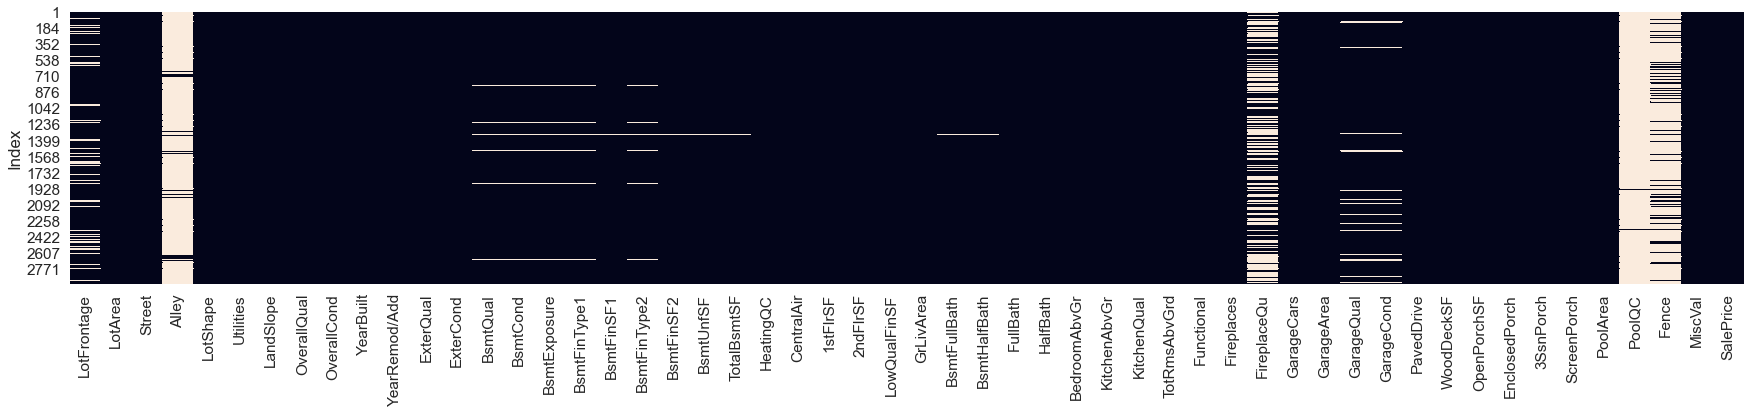

In [6]:
plt.figure(figsize=(30, 5))
sns.heatmap(df.isna(), cbar=None);

In [7]:
# Showing columns with atleast 1 null value
df.isna().sum()[df.isna().sum() > 0].sort_values(ascending=False)

PoolQC          2749
Alley           2619
Fence           2195
FireplaceQu     1319
LotFrontage      467
GarageQual       149
GarageCond       149
BsmtExposure      78
BsmtFinType2      77
BsmtFinType1      76
BsmtCond          76
BsmtQual          76
BsmtHalfBath       2
BsmtFullBath       2
GarageCars         1
GarageArea         1
TotalBsmtSF        1
BsmtFinSF2         1
BsmtFinSF1         1
BsmtUnfSF          1
dtype: int64

#### Filling in NaN (null) values
Based on the data documentation, we will fill in the full values with more meaningful ones.

In [8]:
df.PoolQC.fillna('None', inplace=True) # No pool
df.Alley.fillna('None', inplace=True) # No alley access
df.Fence.fillna('None', inplace=True) # No fence
df.FireplaceQu.fillna('None', inplace=True) # No fireplace
df.LotFrontage.fillna(0, inplace=True) # Length of street connection 0
df.GarageCond.fillna('None', inplace=True) # No garage
df.GarageQual.fillna('None', inplace=True) # No garage
df.GarageArea.fillna(0, inplace=True) # No garage
df.GarageCars.fillna(0, inplace=True) # No garage
df.BsmtCond.fillna('None', inplace=True) # No basement
df.BsmtExposure.fillna('None', inplace=True) # No basement
df.BsmtFinType1.fillna('None', inplace=True) # No basement
df.BsmtFinType2.fillna('None', inplace=True) # No basement
df.BsmtFinSF1.fillna(0, inplace=True) # No basement
df.BsmtFinSF2.fillna(0, inplace=True) # No basement
df.BsmtQual.fillna('None', inplace=True) # No basement
df.BsmtHalfBath.fillna(0, inplace=True) # No basement
df.BsmtFullBath.fillna(0, inplace=True) # No basement
df.BsmtUnfSF.fillna(0, inplace=True) # No basement
df.TotalBsmtSF.fillna(0, inplace=True) # No basement

#### Dealing with categorical variables
We need to convert all categorical variables to numerical ones for training our algorithms.

In [9]:
# Showing categorical variables and their unique values
for col in df.dtypes[df.dtypes == 'object'].index:
    print(col+"\t", df[col].unique())

Street	 ['Pave' 'Grvl']
Alley	 ['None' 'Pave' 'Grvl']
LotShape	 ['IR1' 'Reg' 'IR2' 'IR3']
Utilities	 ['AllPub' 'NoSeWa' 'NoSewr']
LandSlope	 ['Gtl' 'Mod' 'Sev']
ExterQual	 ['TA' 'Gd' 'Ex' 'Fa']
ExterCond	 ['TA' 'Gd' 'Fa' 'Po' 'Ex']
BsmtQual	 ['TA' 'Gd' 'Ex' 'None' 'Fa']
BsmtCond	 ['Gd' 'TA' 'None' 'Fa' 'Po' 'Ex']
BsmtExposure	 ['Gd' 'No' 'Mn' 'Av' 'None']
BsmtFinType1	 ['BLQ' 'Rec' 'ALQ' 'GLQ' 'Unf' 'LwQ' 'None']
BsmtFinType2	 ['Unf' 'LwQ' 'BLQ' 'Rec' 'None' 'GLQ' 'ALQ']
HeatingQC	 ['Fa' 'TA' 'Ex' 'Gd' 'Po']
CentralAir	 ['Y' 'N']
KitchenQual	 ['TA' 'Gd' 'Ex' 'Fa' 'Po']
Functional	 ['Typ' 'Mod' 'Min1' 'Min2' 'Maj1' 'Maj2' 'Sev' 'Sal']
FireplaceQu	 ['Gd' 'None' 'TA' 'Po' 'Ex' 'Fa']
GarageQual	 ['TA' 'None' 'Fa' 'Gd' 'Ex' 'Po']
GarageCond	 ['TA' 'None' 'Fa' 'Gd' 'Ex' 'Po']
PavedDrive	 ['P' 'Y' 'N']
PoolQC	 ['None' 'Ex' 'Gd' 'TA' 'Fa']
Fence	 ['None' 'MnPrv' 'GdPrv' 'GdWo' 'MnWw']


#### Encoding categories variables
Some of the categorical feature can be encoded as ordered numbers. We are encoding these manually for better accuracy as the automatic label encoders cannot always idenify the correct order on their own [(juliencs, 2016)](https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset).

In [10]:
df.replace({"Alley" : {"None": 0, "Grvl" : 1, "Pave" : 2},
            "BsmtCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
            "BsmtExposure" : {"None" : 0, "No" : 0, np.nan : 0,"Mn" : 1, "Av": 2, "Gd" : 3},
            "BsmtFinType1" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
            "BsmtFinType2" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
            "BsmtQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
            "CentralAir": {'N': 0, "Y": 1},
            "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
            "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
            "Fence": {"None": 0, "MnWw": 1, "GdWo": 2, "MnPrv": 3, "GdPrv": 4},
            "FireplaceQu" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
            "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, "Min2" : 6, "Min1" : 7, "Typ" : 8},
            "GarageCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
            "GarageQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
            "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
            "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
            "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
            "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
            "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
            "PoolQC" : {"None" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
            "Street" : {"Grvl" : 1, "Pave" : 2},
            "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}},
           inplace=True)

## 3. Exploratory Analysis
Now that our data has been cleaned, we will explore the dataset to find patterns, trends, indentify unexpected data points etc.

#### Correlation
For a regression analysis its a good idea so see which variables correlate most with the target variable `SalePrice`.

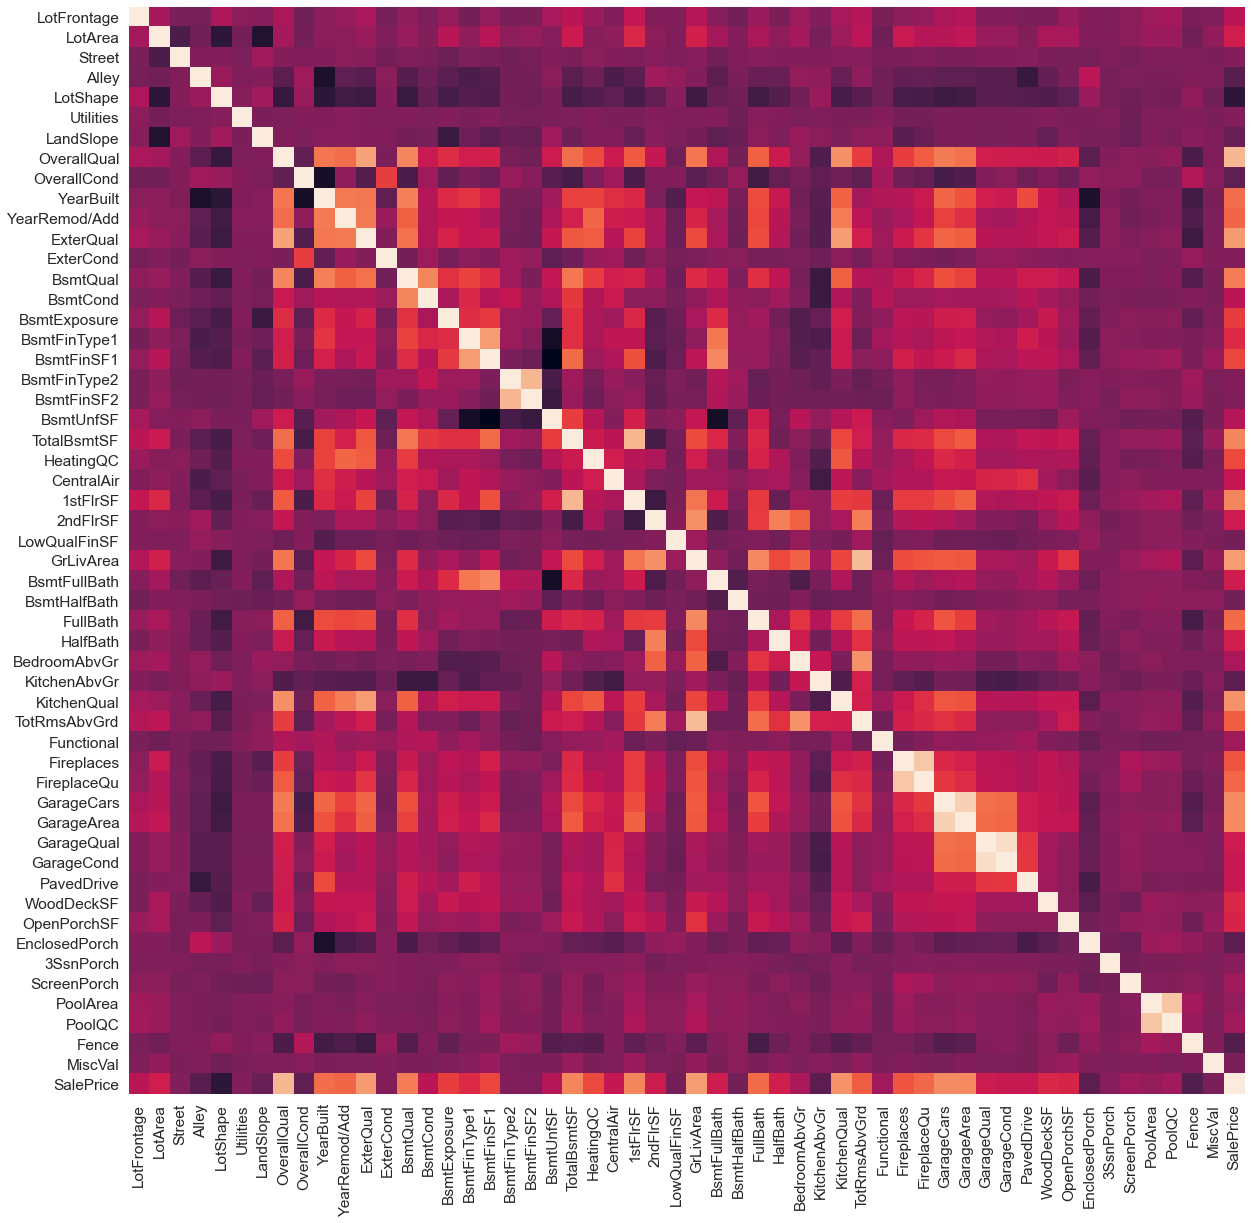

In [11]:
# Visualizing correlation between variables
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=False, cbar=False);

Now lets take a look at which variable have the highest correlation with `SalePrice`

In [12]:
# Leaving out the correlation for SalePrice with SalePrice as it will be 1
df.corr()['SalePrice'].sort_values(ascending=False)[1:]

OverallQual      0.799466
GrLivArea        0.706840
ExterQual        0.700989
KitchenQual      0.668854
GarageCars       0.645240
GarageArea       0.638691
TotalBsmtSF      0.631792
1stFlrSF         0.629236
BsmtQual         0.600984
YearBuilt        0.550205
FullBath         0.541701
FireplaceQu      0.533349
YearRemod/Add    0.523655
TotRmsAbvGrd     0.498082
Fireplaces       0.474297
HeatingQC        0.440901
BsmtFinSF1       0.437077
BsmtExposure     0.408721
BsmtFinType1     0.335478
WoodDeckSF       0.328602
OpenPorchSF      0.313773
HalfBath         0.285493
LotArea          0.282978
BsmtFullBath     0.273260
2ndFlrSF         0.270310
GarageQual       0.266062
PavedDrive       0.253583
GarageCond       0.248741
CentralAir       0.245039
BsmtCond         0.205146
LotFrontage      0.204462
BsmtUnfSF        0.181278
BedroomAbvGr     0.144938
PoolQC           0.116079
Functional       0.112603
ScreenPorch      0.112531
PoolArea         0.070849
3SsnPorch        0.032052
Street      

#### Visualizing variables with high correlation with `SalePrice`

It seems that the overall quality (`OverallQual`) of the house and the general living area (`GrLivArea`) have the highest correlation with the `SalePrice`.

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

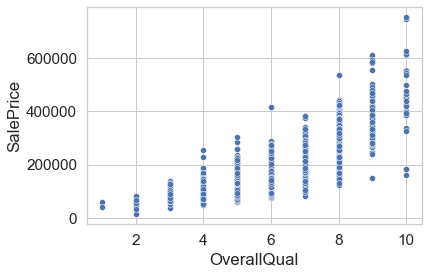

In [13]:
sns.scatterplot(data=df, x='OverallQual', y='SalePrice')

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

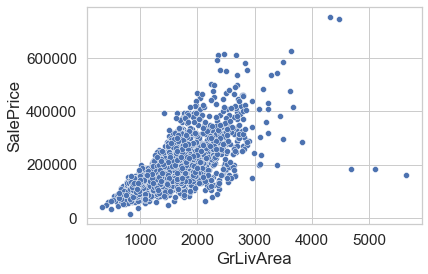

In [14]:
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice')

#### Removing outliers
Its a good idea to remove extreme or unusual values. The author of the dataset, [De Cock (2011)](http://jse.amstat.org/v19n3/decock.pdf) warns us about potential pitfalls due to partial sales that likely don’t represent actual market values. He recommends "removing any houses with more than 4000 square feet from the data set".

In [15]:
# Houses with large living area which were sold at low prices
df.drop(index=df[df.GrLivArea > 4000].index, inplace=True)

Now that we have removed the outliers lets visualize all three variables at see how the scatter plot looks

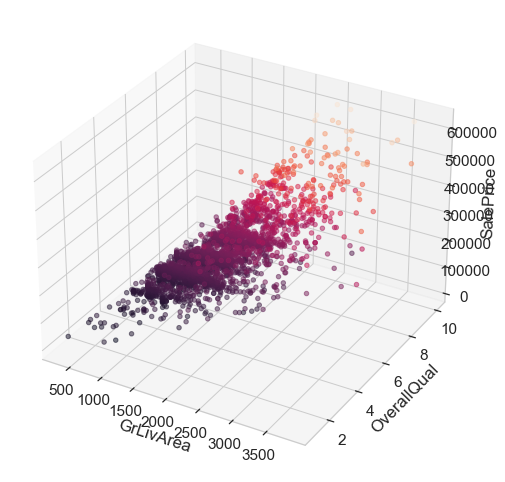

In [16]:
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection='3d')
ax.scatter3D(df['GrLivArea'], df['OverallQual'], df['SalePrice'], c=df['SalePrice'], alpha=0.5)
ax.set_xlabel('GrLivArea')
ax.set_ylabel('OverallQual')
ax.set_zlabel('SalePrice')
plt.tight_layout()

The relation seems to be more or less linear. Although there is greater variance towards the higher values of `SalePrice`.

#### Distribution of target variable `SalePrice`
We can see that the distribution of the target variable is skewed

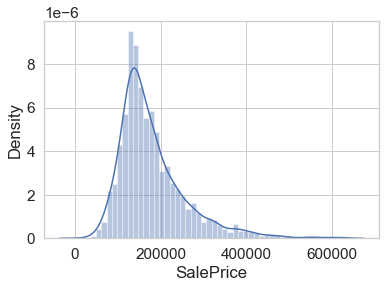

In [17]:
sns.distplot(a=df['SalePrice']);

Its a good idea to convert it to the log scale to get a normal distribution (increases accuracy) [(juliencs, 2016)](https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset).

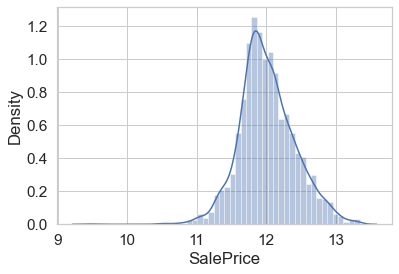

In [18]:
df.SalePrice = np.log1p(df.SalePrice)
sns.distplot(a=df['SalePrice']);

## 4. Regression
Now that our data has been cleaned and outliers removed we can move on to training our regression models.
### 4.1. Preparing data for training
Seperating the feature variables from the target variable which we want to predict using the features

In [19]:
X = df.drop(columns='SalePrice') # Features (all columns except SalePrice)
y = df['SalePrice'] # Target variable (the SalePrice of the property)

Now we will split the dateset into training, testing and validation sets. 

We are choosing a ratio of train:test:validation ratio of 70:15:15 since we had to remove non-reidential rows which reduced the number of observations we initially had. So if we wanted to keep 10% of the data for testing and 10% for validation the data points in the test and validation sets would be very small.

In [20]:
# First we will seperate 70% of data for training and 30% for testing (which we will again split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (1929, 53)
y_train shape: (1929,)


Now we will take the test set (30% of data) and split it into testing (15%) and validation (15%) sets.

In [21]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=0)
print("X_test shape:", X_test.shape)
print("X_val shape:", X_val.shape)
print("y_test shape:", y_test.shape)
print("y_val shape:", y_val.shape)

X_test shape: (414, 53)
X_val shape: (414, 53)
y_test shape: (414,)
y_val shape: (414,)


### 4.2. Training regression models

In [22]:
# Linear Regression #
#-------------------#
lin_reg = LinearRegression().fit(X_train, y_train)


# Polynomial Regression #
#-----------------------#
poly = PolynomialFeatures(degree=2)
# Taking 2nd degree polynomials of features
X_train_p = poly.fit_transform(X_train)
X_test_p = poly.fit_transform(X_test)
X_val_p = poly.fit_transform(X_val)
# Training model
pol_reg = LinearRegression().fit(X_train_p, y_train)


# Random forest Regression #
#--------------------------#
rf = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)


# Support Vector Regression (SVR) using Radial Basis Function (RBF) kernel #
#--------------------------------------------------------------------------#
rbf = SVR(kernel='rbf', gamma='scale', C=150).fit(X_train, y_train)

## 5. Evaluating models
### 5.1. Bias and Vairance analysis
In the evaluation stage we will try to determine which regression model is best for this particular task. We will look at the R<sup>2</sup> values and MSE (Mean Squared Error) for each of the models on the training, test and validation set to analyze bias and variance.

In general, high bias and low variance indicates underfitting, while low bias and high variance indicates overfitting [(Ng, 2017)](https://www.youtube.com/watch?v=SjQyLhQIXSM). Ideally we want a model with low bias and low variance that fits the training data well, but can also generalize its predictions to other datapoints that it has never seen before.

Here are a few examples given by [Andrew Ng (2017)](https://www.youtube.com/watch?v=SjQyLhQIXSM) for training and testing errors and what they mean in terms of bias and variance.
- train error: 1%,  test error: 10% (low bias, high variance = overfit)
- train error: 15%, test error: 16% (high bias, low variance = underfit)
- train error: 15%, test error: 30% (high bias, high variance = underfit train data, could not generalize)
- train error: 0.5%, test error: 1% (low bias, low variance = ideal)

#### Linear regression

In [23]:
print(f"Training scores   :\tR^2 = {round(lin_reg.score(X_train, y_train),5)};\t MSE = {round(mean_squared_error(y_train, lin_reg.predict(X_train)),5)}")
print(f"Testing scores    :\tR^2 = {round(lin_reg.score(X_test, y_test),5)};\t MSE = {round(mean_squared_error(y_test, lin_reg.predict(X_test)),5)}")
print(f"Validation scores :\tR^2 = {round(lin_reg.score(X_val, y_val),5)};\t MSE = {round(mean_squared_error(y_val, lin_reg.predict(X_val)),5)}")

Training scores   :	R^2 = 0.91039;	 MSE = 0.01378
Testing scores    :	R^2 = 0.90571;	 MSE = 0.01537
Validation scores :	R^2 = 0.89441;	 MSE = 0.01859


**Comments:** The linear model performed quite well. The R<sup>2</sup> scores are either above or close to 90% while the MSEs are around 1%. The scores are best for the training data, then the test set and then the validation set. This indicates that the model has fit the training data well and has also been able to generalize its predictions to unseen data.

#### Polynomial regression

In [24]:
print(f"Training scores   :\tR^2 = {round(pol_reg.score(X_train_p, y_train),5)};\t MSE = {round(mean_squared_error(y_train, pol_reg.predict(X_train_p)),5)}")
print(f"Testing scores    :\tR^2 = {round(pol_reg.score(X_test_p, y_test),5)};\t MSE = {round(mean_squared_error(y_test, pol_reg.predict(X_test_p)),5)}")
print(f"Validation scores :\tR^2 = {round(pol_reg.score(X_val_p, y_val),5)};\t MSE = {round(mean_squared_error(y_val, pol_reg.predict(X_val_p)),5)}")

Training scores   :	R^2 = 0.97867;	 MSE = 0.00328
Testing scores    :	R^2 = -1.01349;	 MSE = 0.32817
Validation scores :	R^2 = -0.02958;	 MSE = 0.18124


**Comments:** The polynomial 2nd degree model performed very well on the training set with an over 97% R<sup>2</sup> value and a very small MSE. However, it performed very poorly for testing and validation. This indicates low bias and high variance which is a clear sign of overfitting the training set and that the model is unable to generalize its predictions to unseen data.

<u>Note</u>:<br>
A negative R<sup>2</sup> value is not a mathematical impossibility, since the value is not really a square of anything. It simply means that the model performed poorly. R<sup>2</sup> compares the fit of the chosen model with that of a horizontal straight line (the null hypothesis). If the chosen model fits worse than a horizontal line, then R<sup>2</sup> is negative. R<sup>2</sup> is negative only when the chosen model does not follow the trend of the data, so fits worse than a horizontal line. <u>Source</u>: [Harvey Motulsky, 2011](https://stats.stackexchange.com/questions/12900/when-is-r-squared-negative).

#### Random forest regression

In [25]:
print(f"Training scores   :\tR^2 = {round(rf.score(X_train, y_train),5)};\t MSE = {round(mean_squared_error(y_train, rf.predict(X_train)),5)}")
print(f"Testing scores    :\tR^2 = {round(rf.score(X_test, y_test),5)};\t MSE = {round(mean_squared_error(y_test, rf.predict(X_test)),5)}")
print(f"Validation scores :\tR^2 = {round(rf.score(X_val, y_val),5)};\t MSE = {round(mean_squared_error(y_val, rf.predict(X_val)),5)}")

Training scores   :	R^2 = 0.98285;	 MSE = 0.00264
Testing scores    :	R^2 = 0.90574;	 MSE = 0.01536
Validation scores :	R^2 = 0.88426;	 MSE = 0.02037


**Comments:** The random forest model also performed quite well. It fit the training data very well with an R<sup>2</sup> of over 98% and a very small prediction error of only 0.256%. Although it performed fairly well on the test and validation sets,  its performance compared to its training scores was much worse (around 8% difference). It seems that the model has low bias but high variance. But since the test and validation scores are around 90% it is still a very good choice.

#### Support Vector Regression using RBF Kernel

In [26]:
print(f"Training scores   :\tR^2 = {round(rbf.score(X_train, y_train),5)};\t MSE = {round(mean_squared_error(y_train, rbf.predict(X_train)),5)}")
print(f"Testing scores    :\tR^2 = {round(rbf.score(X_test, y_test),5)};\t MSE = {round(mean_squared_error(y_test, rbf.predict(X_test)),5)}")
print(f"Validation scores :\tR^2 = {round(rbf.score(X_val, y_val),5)};\t MSE = {round(mean_squared_error(y_val, rbf.predict(X_val)),5)}")

Training scores   :	R^2 = 0.85588;	 MSE = 0.02217
Testing scores    :	R^2 = 0.79933;	 MSE = 0.03271
Validation scores :	R^2 = 0.74653;	 MSE = 0.04462


**Comments:** The SVR-RBF model had the lowest training, testing and validation scores (around 74-85%) and also the highest prediction errors (2-4%) among the tested models. It seems to have fit the training data relatively poorly and compared to other models seems to be a poor choice for this dataset.

### 5.2. K-fold cross validation
Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model. It is a popular method because it is simple to understand and because it generally results in a less biased or less optimistic estimate of the model skill than other methods, such as a simple train/test split. <u>Source</u>: [Brownlee (2020)](https://machinelearningmastery.com/k-fold-cross-validation/)

In [27]:
# Prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#### Linear regression

In [28]:
# Evaluate model
scores = cross_val_score(lin_reg, X, y, scoring='r2', cv=cv, n_jobs=-1)
scores2 = cross_val_score(lin_reg, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

print("Mean R^2 score     :", round(np.mean(scores), 5), "Standard deviation:", round(np.std(scores), 5))
print("Mean squared error :", round(-np.mean(scores2), 5), "Standard deviation:", round(np.std(scores2), 5))

Mean R^2 score     : 0.90922 Standard deviation: 0.01837
Mean squared error : 0.01444 Standard deviation: 0.00416


#### Polynomial regression

In [29]:
# Evaluate model
scores = cross_val_score(pol_reg, X, y, scoring='r2', cv=cv, n_jobs=-1)
scores2 = cross_val_score(pol_reg, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

print("Mean R^2 score     :", round(np.mean(scores), 5), "Standard deviation:", round(np.std(scores), 5))
print("Mean squared error :", round(-np.mean(scores2), 5), "Standard deviation:", round(np.std(scores2), 5))

Mean R^2 score     : 0.90922 Standard deviation: 0.01837
Mean squared error : 0.01444 Standard deviation: 0.00416


#### Random forest regression

In [30]:
# Evaluate model
scores = cross_val_score(rf, X, y, scoring='r2', cv=cv, n_jobs=-1)
scores2 = cross_val_score(rf, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

print("Mean R^2 score     :", round(np.mean(scores), 5), "Standard deviation:", round(np.std(scores), 5))
print("Mean squared error :", round(-np.mean(scores2), 5), "Standard deviation:", round(np.std(scores2), 5))

Mean R^2 score     : 0.89161 Standard deviation: 0.02383
Mean squared error : 0.01722 Standard deviation: 0.00576


#### Support Vector Regression using RBF Kernel

In [31]:
# Evaluate model
scores = cross_val_score(rbf, X, y, scoring='r2', cv=cv, n_jobs=-1)
scores2 = cross_val_score(rbf, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

print("Mean R^2 score     :", round(np.mean(scores), 5), "Standard deviation:", round(np.std(scores), 5))
print("Mean squared error :", round(-np.mean(scores2), 5), "Standard deviation:", round(np.std(scores2), 5))

Mean R^2 score     : 0.82116 Standard deviation: 0.05808
Mean squared error : 0.02887 Standard deviation: 0.01294


## 6. Conclusion
From the R<sup>2</sup> scores and MSEs during the bais variance analysis and k-fold cross validation we can see that the linear regression model has been the overall best performer. Interestingly the polynomial regression model had the same score as the linear regression model during cross validation, although it performed far worse in the bias variance analysis. The random forest model was also another promising model during the bias variance analysis but had a slightly lower score compared to linear regression during cross validation. The SVR-RBF model was the worse performer in both cases.

We can conclude that the linear regression model is the best choice for this particular dataset, followed by the random forest model.

## References
Alfiyatin, A. N., Febrita, R. E., Taufiq, H., & Mahmudy, W. F. (2017). Modeling house price prediction using regression analysis and particle swarm optimization. *International Journal of Advanced Computer Science and Applications, 8*.

Brownlee, J. (2020, August 3). A Gentle Introduction to k-fold Cross-Validation. *Machine Learning Mastery*. https://machinelearningmastery.com/k-fold-cross-validation/

De Cock, D. (2011). Ames, Iowa: Alternative to the Boston housing data as an end of semester regression project. *Journal of Statistics Education, 19(3)*.

juliencs. (2016). A study on Regression applied to the Ames dataset. *Kaggle*. https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset

Motulsky, H. (2011, July 13). When is R squared negative?. *StackExchange*. https://stats.stackexchange.com/questions/12900/when-is-r-squared-negative

Ng, A. [DeepLearningAI]. (2017, August 25). *Bias/Variance (C2W1L02)* [Video]. YouTube. https://www.youtube.com/watch?v=SjQyLhQIXSM

Nghiep, N., & Al, C. (2001). Predicting housing value: A comparison of multiple regression analysis and artificial neural networks. *Journal of real estate research, 22(3), 313-336*.

Rahadi, R. A., Wiryono, S. K., Koesrindartoto, D. P., & Syamwil, I. B. (2015). Factors influencing the price of housing in Indonesia. *International Journal of Housing Markets and Analysis*.